In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
receiversref_p = "/raid4/hra35/FMTOMO_REYK/final_models/final_NEWsmavg/invert_p/receiversref.in"
receivers_p = "/raid4/hra35/FMTOMO_REYK/final_models/final_NEWsmavg/invert_p/receivers.in"

receiversref_s = "/raid4/hra35/FMTOMO_REYK/final_models/final_NEWsmavg/invert_s/receiversref.in"
receivers_s = "/raid4/hra35/FMTOMO_REYK/final_models/final_NEWsmavg/invert_s/receivers.in"

In [3]:
# read the receivers.in files to get event coordinates
with open(receiversref_p, 'r') as file:
    receiversrefp_lines = file.readlines()
        
with open(receiversref_s, 'r') as file:
    receiversrefs_lines = file.readlines()
    
with open(receivers_p, 'r') as file:
    receiversp_lines = file.readlines()
        
with open(receivers_s, 'r') as file:
    receiverss_lines = file.readlines()
    
# save number of P picks
p_count = int(receiversrefp_lines[0].split()[0])
print(p_count)
    
# save event coordinates into dataframe
p_df = pd.DataFrame(data=None, columns=["lati","loni","depthi","latf","lonf","depthf"])
    
for i in range(p_count):
        
    init_event_line = receiversrefp_lines[1+4*i]
    entries = init_event_line.split()
    depthi = entries[0]
    lati = entries[1]
    loni = entries[2]
    
    event_line = receiversp_lines[1+4*i]
    entries = event_line.split()
    depth = entries[0]
    lat = entries[1]
    lon = entries[2]
    
    data_row = {"lati": lati, "loni": loni, "depthi": depthi, "latf": lat, "lonf": lon, "depthf": depth}
    p_df = p_df.append(data_row, ignore_index=True)
                        
    
# save number of S picks
s_count = int(receiversrefs_lines[0].split()[0])
print(s_count)
    
# save event coordinates into dataframe
s_df = pd.DataFrame(data=None, columns=["lati","loni","depthi","latf","lonf","depthf"])
    
for i in range(s_count):
        
    init_event_line = receiversrefs_lines[1+4*i]
    entries = init_event_line.split()
    depthi = entries[0]
    lati = entries[1]
    loni = entries[2]
    
    event_line = receiverss_lines[1+4*i]
    entries = event_line.split()
    depth = entries[0]
    lat = entries[1]
    lon = entries[2]
    
    data_row = {"lati": lati, "loni": loni, "depthi": depthi, "latf": lat, "lonf": lon, "depthf": depth}
    s_df = s_df.append(data_row, ignore_index=True)

    
# concatenate the two dataframes and remove duplicates
all_df = pd.concat([p_df, s_df], ignore_index=True)
    
numerical_columns = ['lati', 'loni', 'depthi', 'latf', 'lonf', 'depthf']
for column in numerical_columns:
    all_df[column] = all_df[column].astype(float)
        
#print("Number of picks is ", len(all_df))
all_df.drop_duplicates(inplace=True)
#print("Number of events is ", len(all_df))

14165
13353


In [4]:
all_df["latd"] = all_df["lati"] - all_df["latf"]
all_df["lond"] = all_df["loni"] - all_df["lonf"]
all_df["depthd"] = all_df["depthi"] - all_df["depthf"]

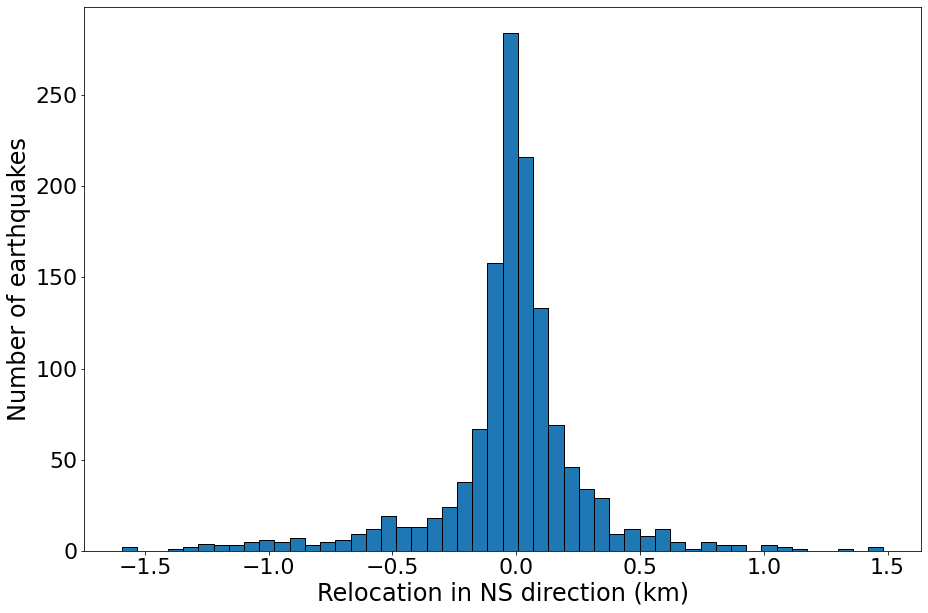

In [10]:
plt.figure(figsize=(15, 10))

plt.hist(all_df["latd"]*111, bins = 50, edgecolor="black")

plt.xlabel("Relocation in NS direction (km)", fontsize=24)
plt.ylabel("Number of earthquakes", fontsize=24)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)

plt.savefig('reloc_NS.png', facecolor='white', bbox_inches='tight')
plt.show()

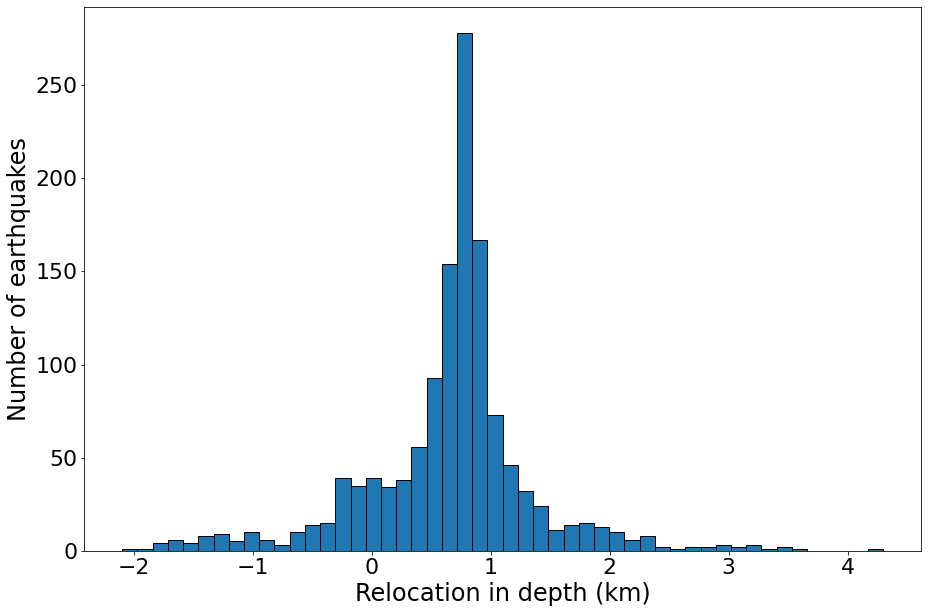

In [11]:
plt.figure(figsize=(15, 10))

plt.hist(all_df["depthd"], bins = 50, edgecolor="black")

plt.xlabel("Relocation in depth (km)", fontsize=24)
plt.ylabel("Number of earthquakes", fontsize=24)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)

plt.savefig('reloc_depth.png', facecolor='white', bbox_inches='tight')

plt.show()

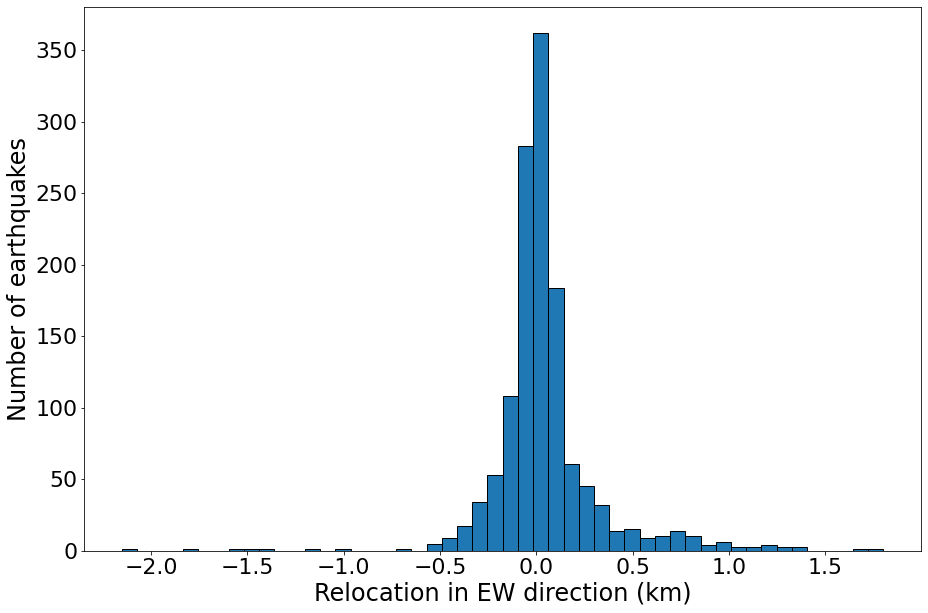

In [12]:
plt.figure(figsize=(15, 10))

plt.hist(all_df["lond"]*49, bins = 50, edgecolor="black")

plt.xlabel("Relocation in EW direction (km)", fontsize=24)
plt.ylabel("Number of earthquakes", fontsize=24)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)

plt.savefig('reloc_EW.png', facecolor='white', bbox_inches='tight')

plt.show()